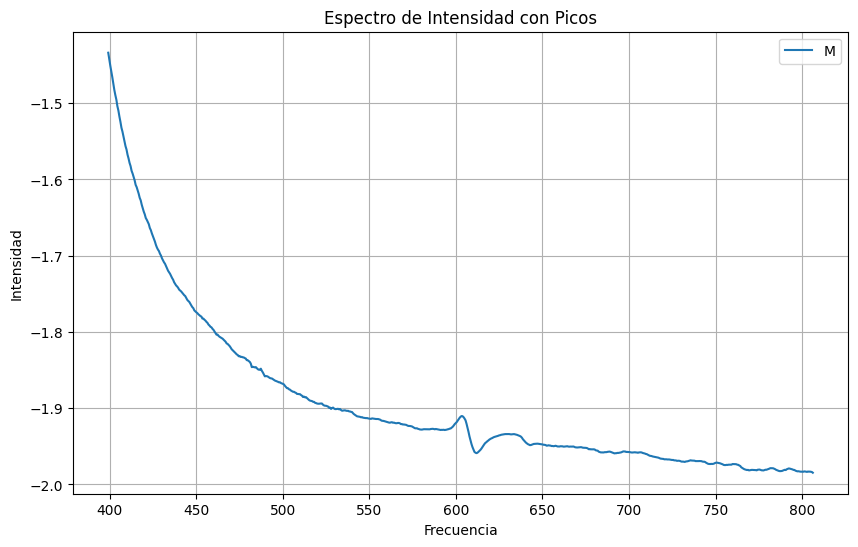

Peaks of M: []


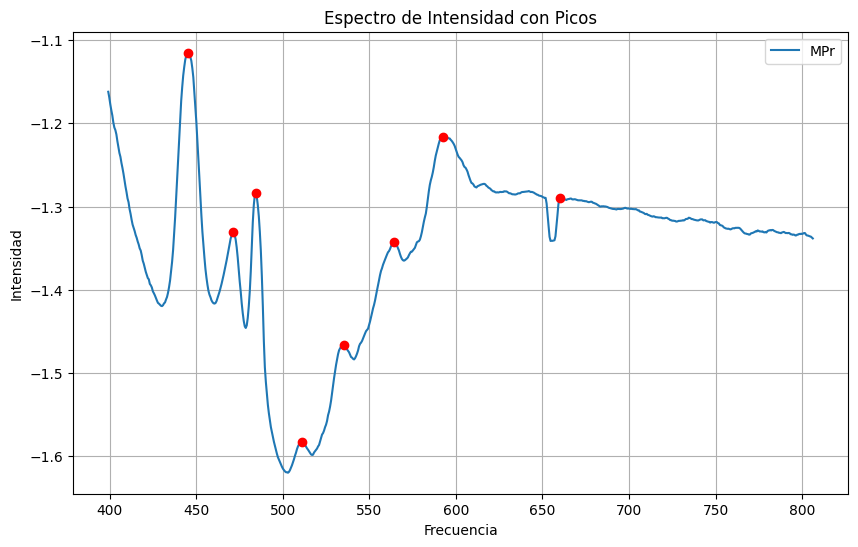

Peaks of MPr: [445.45709228515625 471.0901794433594 484.460205078125 511.1394348144531
 535.4269409179688 564.2496337890625 592.398193359375 660.3458251953125]


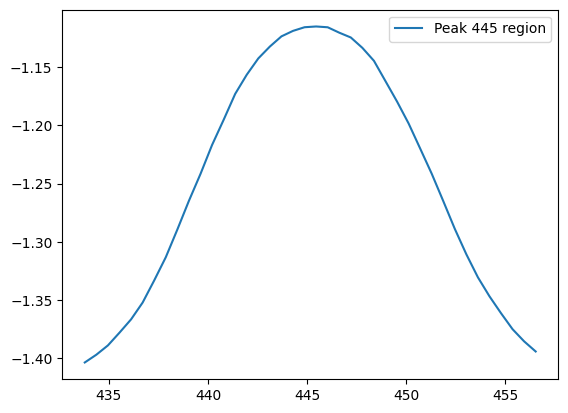

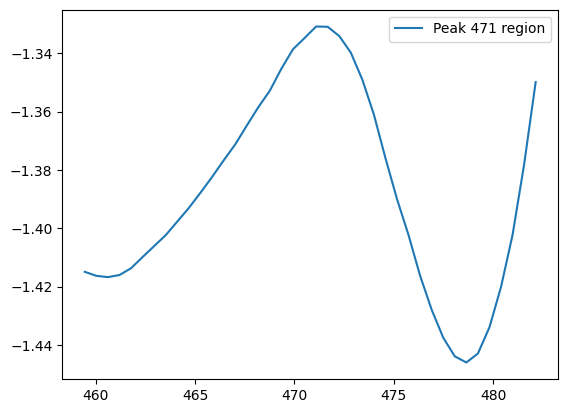

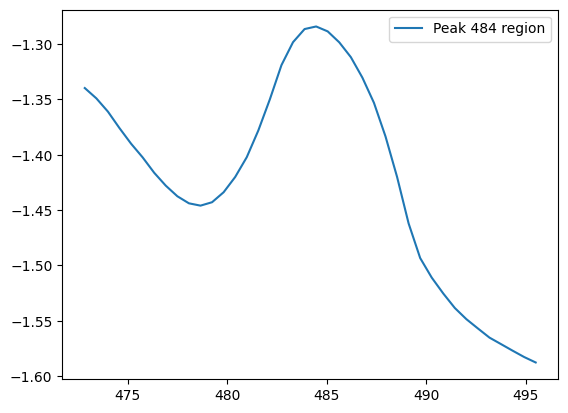

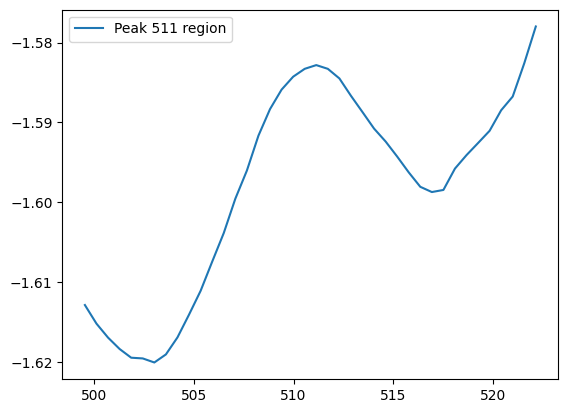

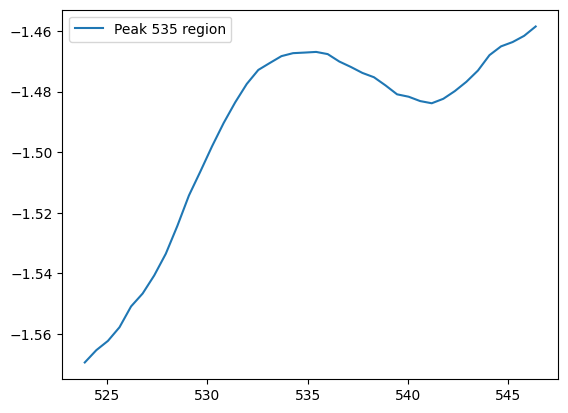

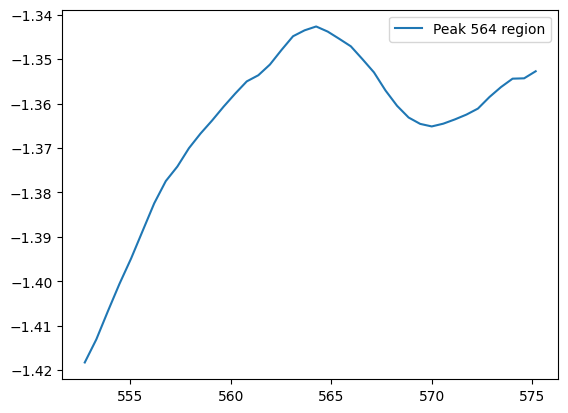

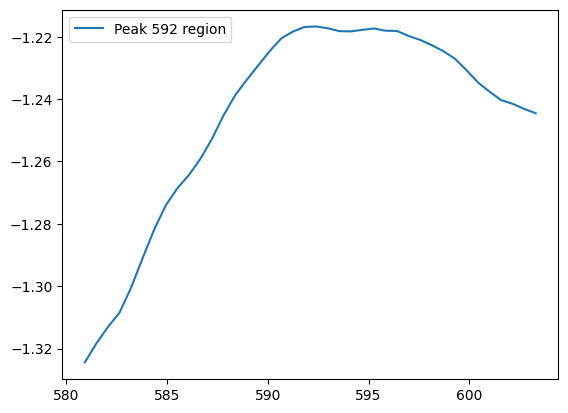

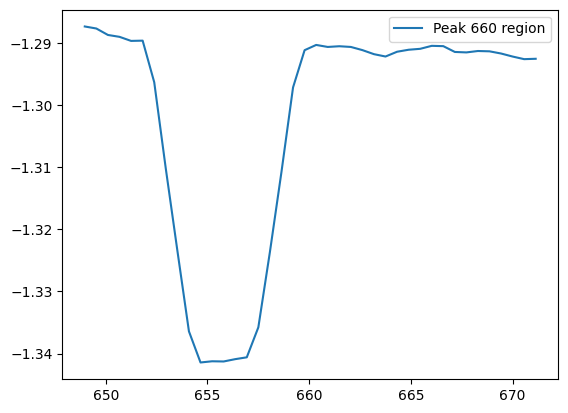

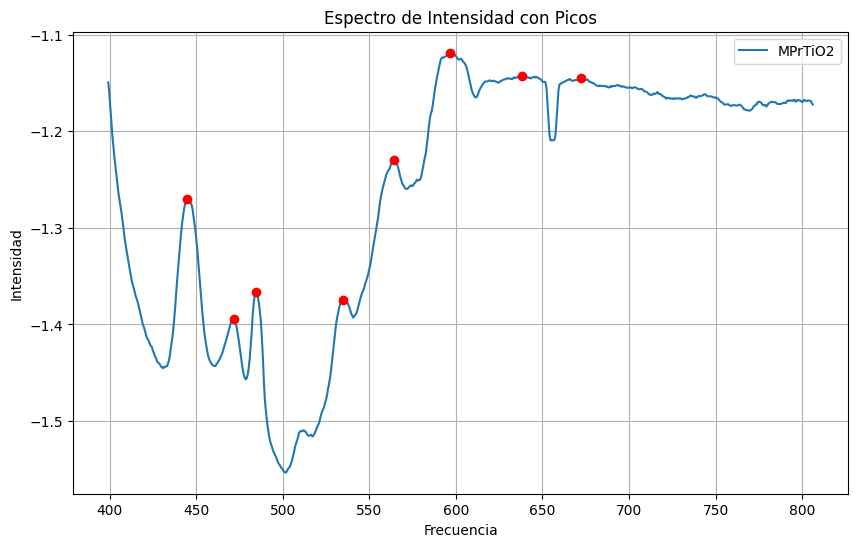

Peaks of MPrTiO2: [444.8736877441406 471.6719055175781 484.460205078125 534.8494262695312
 564.2496337890625 596.4114379882812 638.1427612304688 672.2744140625]


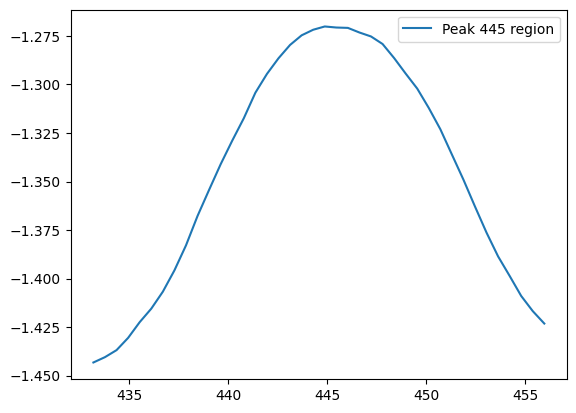

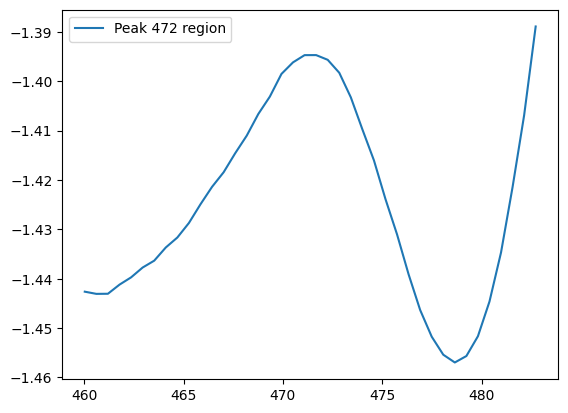

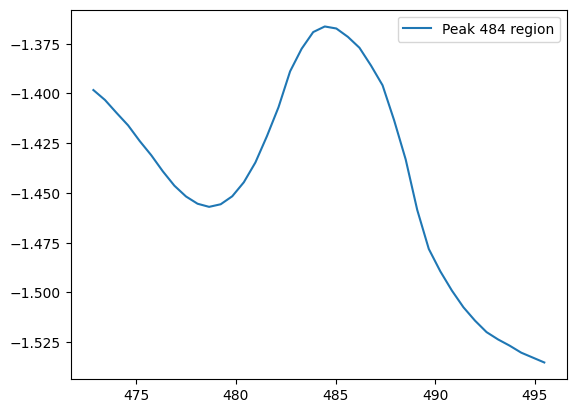

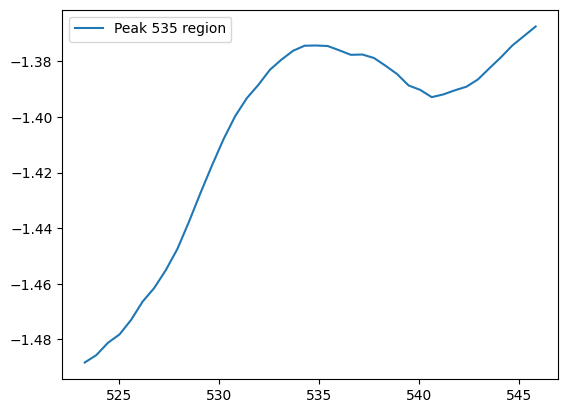

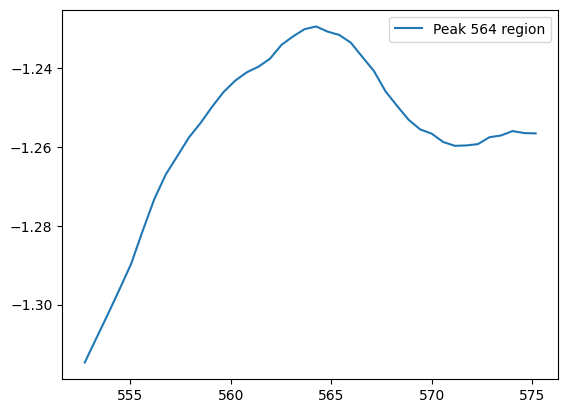

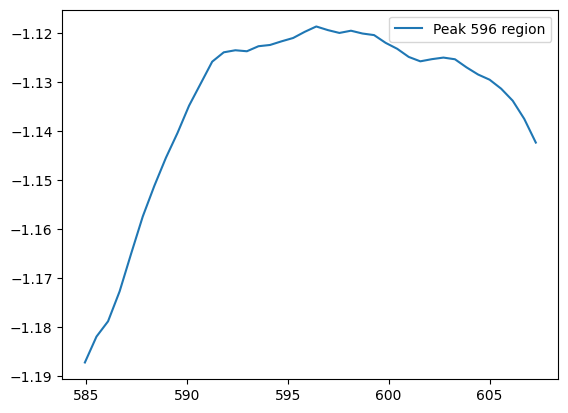

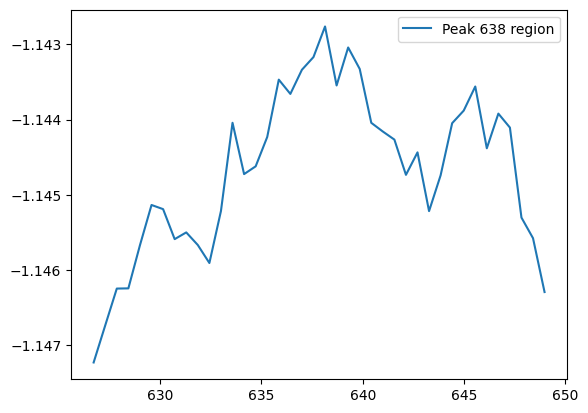

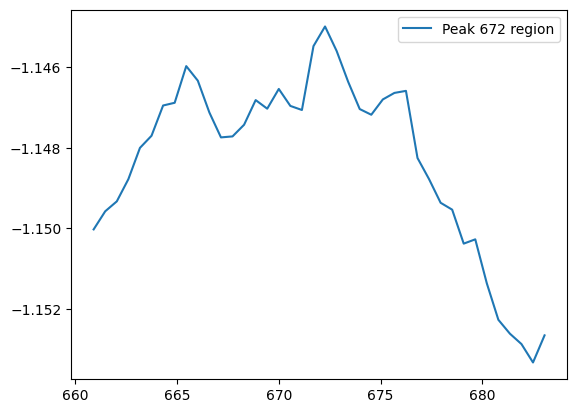

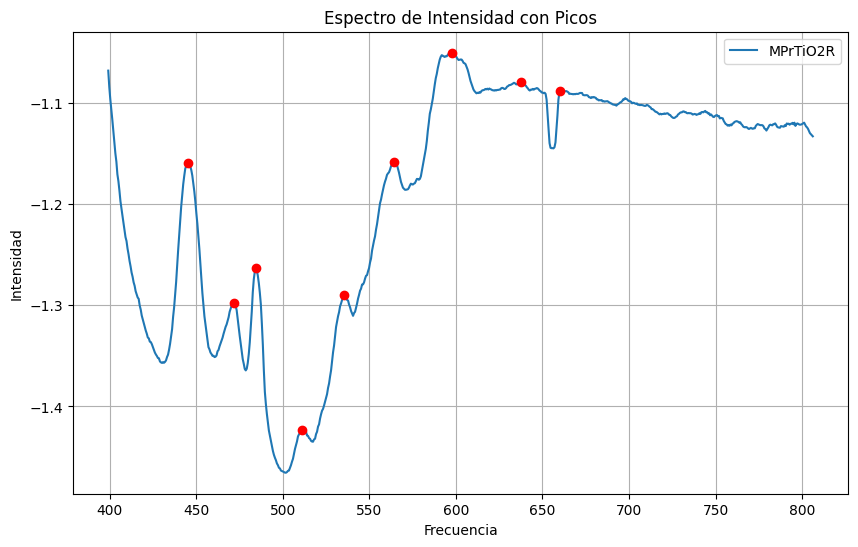

Peaks of MPrTiO2R: [445.45709228515625 471.6719055175781 484.460205078125 511.1394348144531
 535.4269409179688 564.2496337890625 597.5577392578125 637.5726318359375
 660.3458251953125]


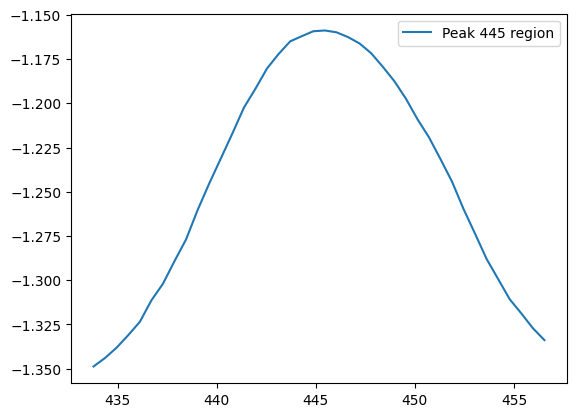

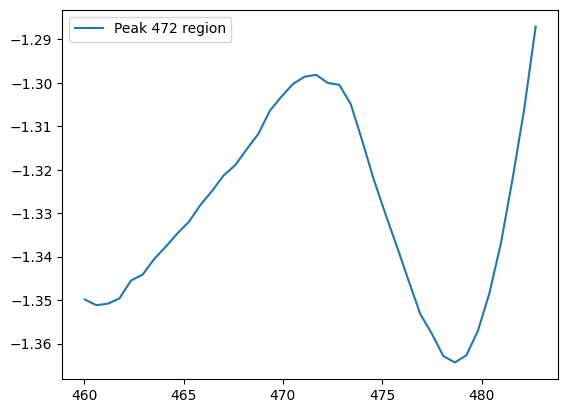

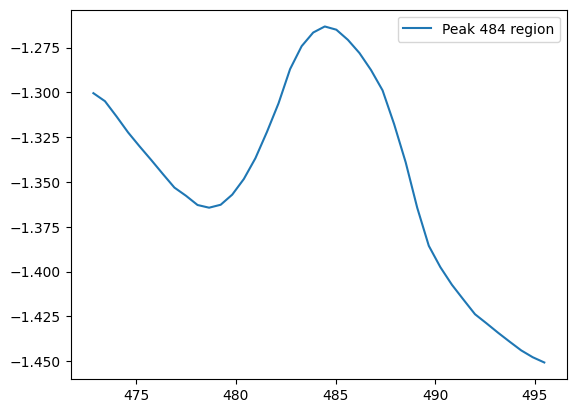

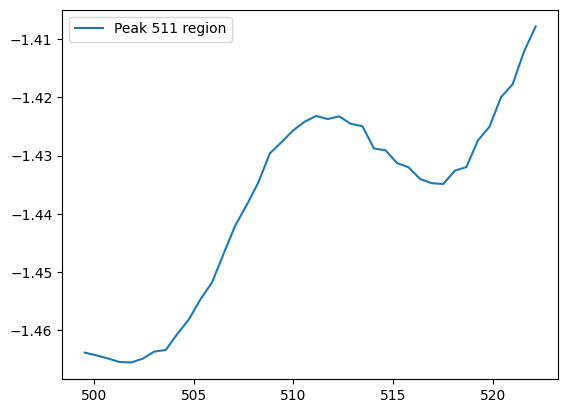

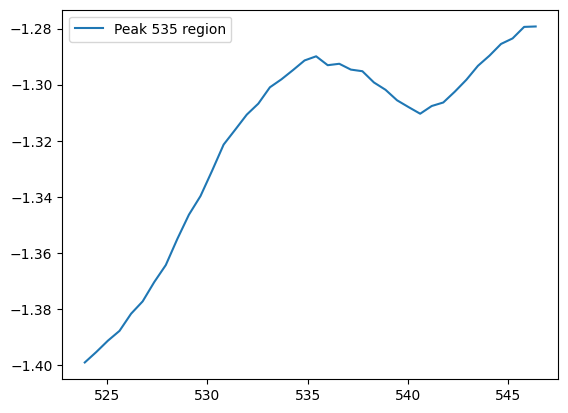

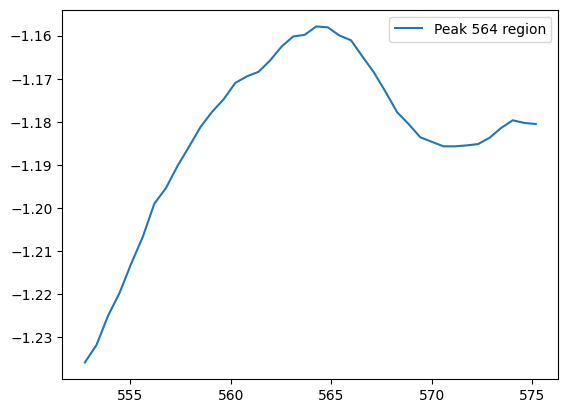

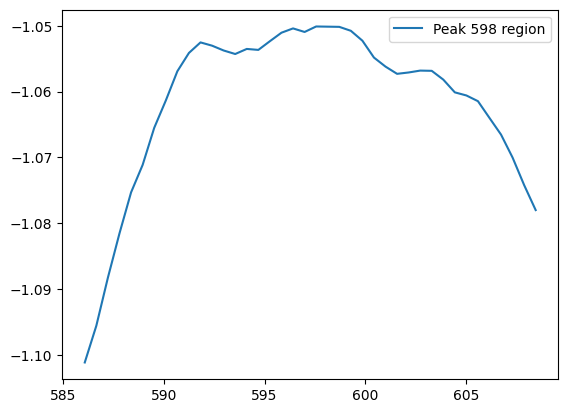

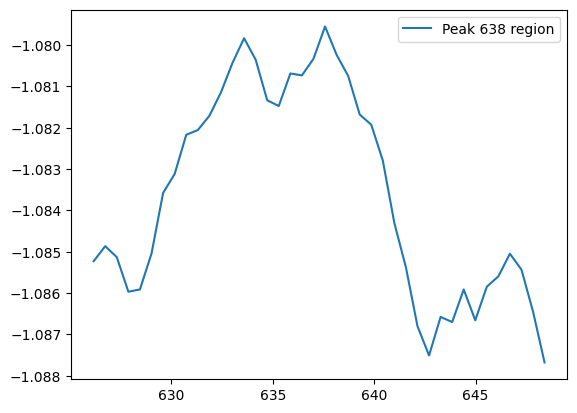

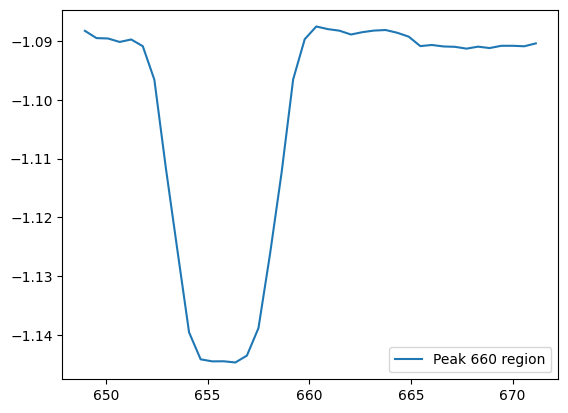

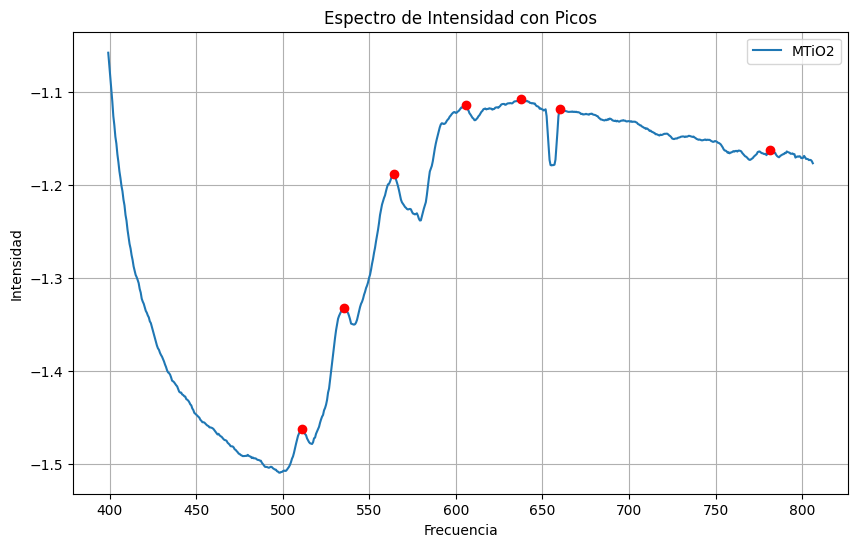

Peaks of MTiO2: [511.1394348144531 535.4269409179688 564.2496337890625 605.5769653320312
 637.5726318359375 660.3458251953125 781.5551147460938]


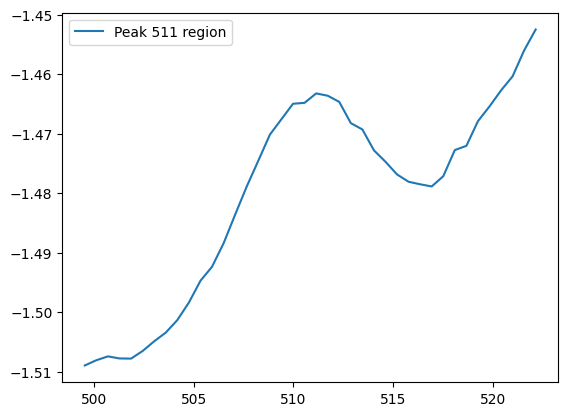

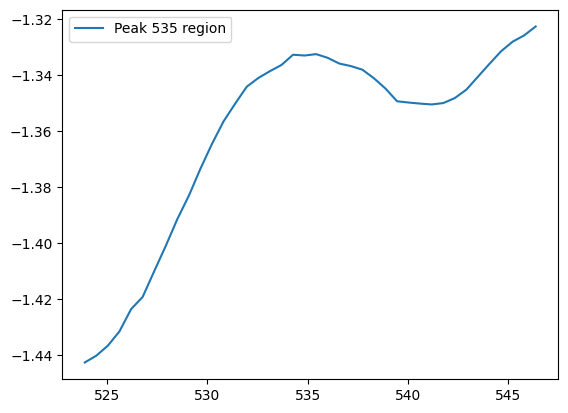

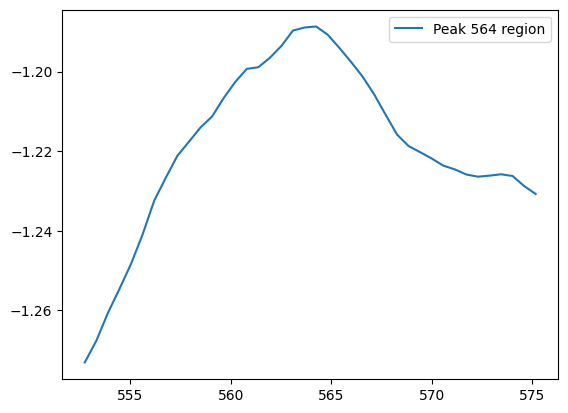

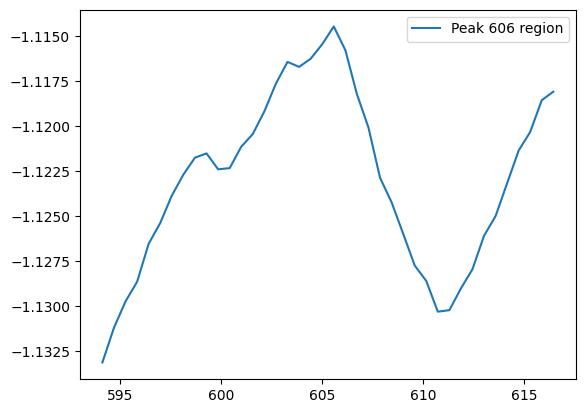

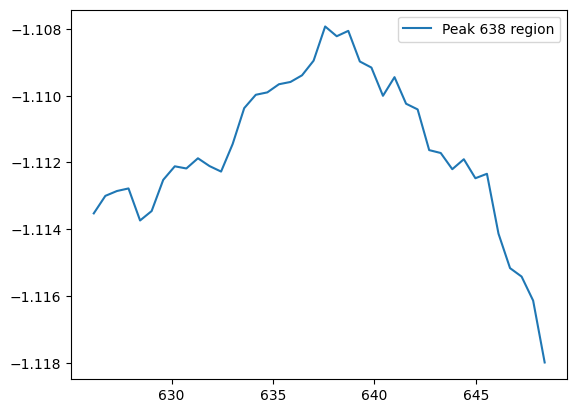

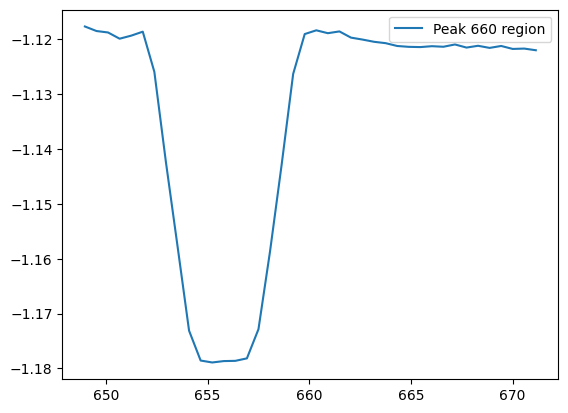

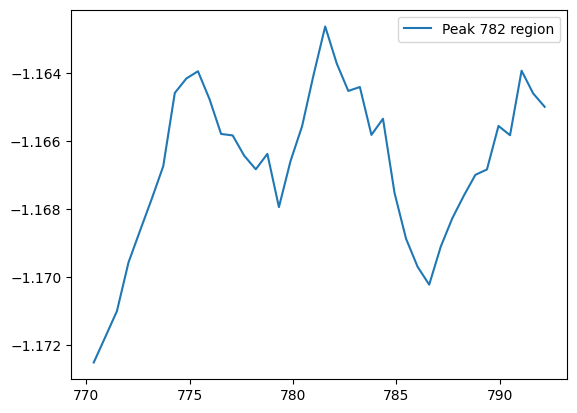

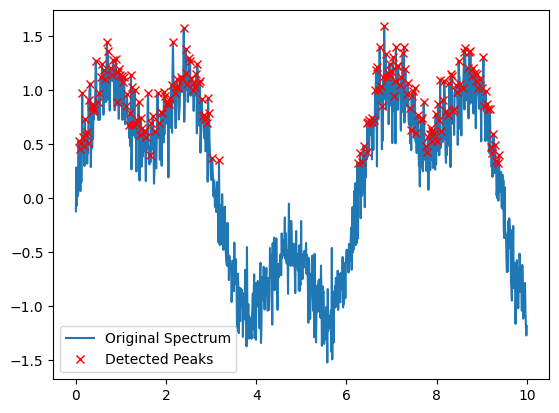

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  4 01:41:05 2023

@author: D. Garro-Cataño
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

from scipy.signal import find_peaks

df = pd.read_excel('TransmPrTiO2.xlsx')

#print(df)

#for i in range(len(df.columns)):
#    coli=df.iloc[5:,i]


##### Acording to file order, name the columns
startrow=388#388#219
endrow=1100#1457

wl=np.array(df.iloc[startrow:endrow,0])

Ag=np.array(df.iloc[startrow:endrow,1])
Ag2=np.array(df.iloc[startrow:endrow,2])

Ag45=np.array(df.iloc[startrow:endrow,3] )
Ag45_H=np.array(df.iloc[startrow:endrow,4] )
Ag45_V=np.array(df.iloc[startrow:endrow,5] )


AgCurved=np.array(df.iloc[startrow:endrow,6] )
AgCurved_H=np.array(df.iloc[startrow:endrow,7] )
AgCurved_V=np.array(df.iloc[startrow:endrow,8] )

Ag_H=np.array(df.iloc[startrow:,9] )
Ag_HV_H=np.array(df.iloc[startrow:,10] )
Ag_V=np.array(df.iloc[startrow:,11] )

M=np.array(df.iloc[startrow:endrow,12] )
M_Pr0=np.array(df.iloc[startrow:endrow,13])
M_Pr2=np.array(df.iloc[startrow:endrow,14] )
M_Pr1=np.array(df.iloc[startrow:endrow,15]) #repeticion
M_Pr=np.array(df.iloc[startrow:endrow,20]) #repeticion

M_Pr_Tio2=np.array(df.iloc[startrow:endrow,16]) #repeticion
M_Pr_Tio2_R=np.array(df.iloc[startrow:endrow,17] )#repeticion
Tio2=np.array(df.iloc[startrow:endrow,18]) #repeticion
Tio2_R=np.array(df.iloc[startrow:endrow,19]) #repeticion

from scipy.interpolate import UnivariateSpline
def FWHM(x,Int):
    HalfMax=(np.max(Int)-Int[0])/2 #Half Maximum of the peak
    HalfMaxwithBackg=HalfMax+Int[0]
    print("Half Max =", HalfMaxwithBackg)
    spline = UnivariateSpline(x, Int-HalfMaxwithBackg, s=0)
    r1, r2 = spline.roots() # find the roots
    Width=r2-r1
    print("FWHM=", Width)
    return Width

def Peakfinder(frecuencia, intensidad,h,name):
    frecuencia=np.array(frecuencia)
    intensidad=np.array(intensidad)
    # Encuentra picos en el espectro de intensidad
    picos, _ = find_peaks(intensidad, height=h,prominence=0.01)  # Ajusta el valor de "height" según tu espectro
    # picos is the peak INDEX

    # Grafica el espectro de intensidad y resalta los picos
    plt.figure(1,figsize=(10, 6))
    plt.plot(frecuencia, intensidad,label="{}".format(name))
    plt.plot(frecuencia[picos], intensidad[picos], 'ro')  # Picos en rojo
    plt.xlabel('Frecuencia')
    plt.ylabel('Intensidad')
    plt.title('Espectro de Intensidad con Picos')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Imprime las frecuencias de los picos
    frecuencias_picos = frecuencia[picos]
    #maxint=max(intensidad[picos])
    #ind=list(intensidad).index(maxint)
    print("Peaks of {}:".format(name), frecuencia[picos]) #frecuencia[picos]
    # to get eV: 1*10**7* 0.00012398/frecuencia[picos]
    # to get k: 1*10**7/frecuencia[picos]

    # Extract a region around each peak
    peaks=picos #peaks indexes #better in english
    x=frecuencia
    y=intensidad
    peak_data = {}
    # volver lo siguiente una funcion de 20
    for peak in peaks:

        # substract the background, or the "floor" from the intensity of the spectrum; set 0 as the beginning of the peak

        # Define the range around each peak (adjust the range as needed)
        start_index = max(0, peak - 20)
        end_index = min(len(x), peak + 20)

        peakx=x[start_index:end_index]
        peaky=y[start_index:end_index]
        """
        # Access the data for a specific peak (for example, the first peak)
        first_peak_data = peak_data[peaks[0]]

        # Plot the extracted region around the first peak
        plt.plot(first_peak_data['x'], first_peak_data['y'], label='Peak {} region'.format(peak))
        plt.legend()
        plt.show()
        """
        # Plot the extracted region around the first peak
        plt.figure(peak)
        plt.plot(peakx,peaky, label='Peak {} region'.format(round(x[peak])))
        plt.legend()
        plt.show()

        """
        ####### let's now define the peak region with 3*sigma to the left and 3*sigma to the right #########
        a=FWHM(peakx,peaky)
        #FWHM=a
        # Define the range around each peak (adjust the range as needed)
        x=np.array([1,2,3])
        print(np.where(x == 2)[0][0])
        start_index = max(0, np.where(x == (x[peak] - 3*a/2))[0][0])
        end_index = min(len(x), np.where(x == (x[peak] + 3*a/2))[0][0])
        # Store the data for each peak in a dictionary (optional)
        #peak_data[peak] = {'x': x[start_index:end_index], 'y': y[start_index:end_index]}
        peakx=x[start_index:end_index]
        peaky=y[start_index:end_index]
        """
        """
        # Access the data for a specific peak (for example, the first peak)
        first_peak_data = peak_data[peaks[0]]

        # Plot the extracted region around the first peak
        plt.plot(first_peak_data['x'], first_peak_data['y'], label='Peak {} region'.format(peak))
        plt.legend()
        plt.show()
        """
        """
        # Plot the extracted region around the first peak
        plt.plot(peakx,peaky, label='Peak {} region'.format(round(x[peak])))
        plt.legend()
        plt.show()
        """



#Peakfinder(wl, -np.log10(Ag),-1.5,"Ag")
#Peakfinder(wl, -np.log10(AgCurved),-0.5,"AgCurved")
#Peakfinder(wl, -np.log10(AgCurved_H),-0.5,"AgCurved_H")
#Peakfinder(wl, -np.log10(AgCurved_V),-0.5,"AgCurved_V")

#print(M_Pr-M)
Peakfinder(wl, -np.log10(M),-0.5,"M")
Peakfinder(wl, -np.log10(abs(M_Pr)),-1.6,"MPr")
#Peakfinder(wl, -np.log10(M_Pr0),-0.5,"AgCurved_V")
#Peakfinder(wl, -np.log10(M_Pr1),-0.5,"AgCurved_V")
#Peakfinder(wl, -np.log10(M_Pr2),-0.5,"AgCurved_V")
Peakfinder(wl, -np.log10(M_Pr_Tio2),-1.6,"MPrTiO2")
Peakfinder(wl, -np.log10(M_Pr_Tio2_R),-1.6,"MPrTiO2R")
Peakfinder(wl, -np.log10(Tio2),-1.6,"MTiO2")
#Peakfinder(wl, -np.log10(Tio2_R),-0.5,"AgCurved_V")
